In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 数据的读取与展示

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[ :5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[ :5000], y_train_all[5000: ]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


### 1.1【重点】 数据归一化

In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28]  -> [None, 784]
# 注意：在训练数据中的数据归一化用 fit_transform，在验证集和测试集中用的是 transform，这是因为要保证均值和方差一致
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


## 2. 模型构建

### 2.1 构建架构

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy", optimizer ="Adam", metrics = ["accuracy"])                 

### 2.2 查看模型架构

## 3. 训练模型

In [5]:
history = model.fit(x_train_scaled, y_train, epochs=10, 
                    validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4603 - accuracy: 0.8333 - val_loss: 0.3680 - val_accuracy: 0.8658
Epoch 2/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3529 - accuracy: 0.8683 - val_loss: 0.3302 - val_accuracy: 0.8798
Epoch 3/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3159 - accuracy: 0.8827 - val_loss: 0.3202 - val_accuracy: 0.8850
Epoch 4/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2928 - accuracy: 0.8908 - val_loss: 0.3328 - val_accuracy: 0.8844
Epoch 5/10
55000/55000 [==============================] - 3s 61us/sample - loss: 0.2753 - accuracy: 0.8969 - val_loss: 0.3418 - val_accuracy: 0.8742
Epoch 6/10
55000/55000 [==============================] - 3s 61us/sample - loss: 0.2593 - accuracy: 0.9026 - val_loss: 0.3160 - val_accuracy: 0.8892
Epoch 7/10
55000/55000 [==============================] -

## 4. 查看训练历史

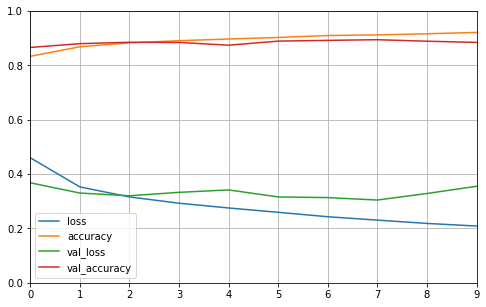

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True) 
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

## 5. 测试数据

In [7]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.38769713948965073, 0.8774]